In [28]:
import pandas as pd


# reading the database
df = pd.read_csv("D://Summer_internship_SEM6//data.csv")

# printing the top 10 rows
display(df.head(10))

,Target,Summary,Skills,Experience,Education
0,ACCOUNTANT,Financial Accountant specializing in financial...,Account reconciliations Results-oriented Finan...,Company Name July 2011 to November 2012 Accoun...,Northern Maine Community College 1994 Associat...
1,ACCOUNTANT,Highly analytical and detail-oriented professi...,DBA Quick Books MAS - Sage Software Microsoft ...,Staff Accountant January 2014 to October 2014 ...,"Bachelor of Science : Accounting , May 2010 Un..."
2,ACCOUNTANT,To obtain a position in a fast-paced business ...,"accounts payables, accounts receivables, Accou...",Accountant January 2011 to November 2015 Compa...,Computer Applications Specialist Certificate P...
3,ACCOUNTANT,No summary available,"accounting, balance sheet, budgets, client, cl...",Company Name June 2011 to Current Senior Accou...,"EMORY UNIVERSITY, Goizueta Business School 5 2..."
4,ACCOUNTANT,Senior accountant who completes accounting act...,Aderant/CMS Excel QuickBooks Pro SQL Access Pe...,Senior Accountant Mar 2006 - Current Company N...,Bachelor of Business Administration : Accounti...
5,ACCOUNTANT,of,"Internet and Microsoft Office - MS Word, MS Po...","Company Name City , State Investment Accountan...",Master of Business Administration : Finance 20...
6,ACCOUNTANT,To pursue excellence in the dynamic business w...,"Dos , Windows 9.x , XP, MS Office, Oracle, Tal...",October 2011 to August 2015 Company Name City ...,"2006 Vidyasagar University City , State , Indi..."
7,ACCOUNTANT,To utilize my customer relations and managemen...,No skills available,Accountant Aug 2015 to Current Company Name ​ ...,"Bachelor of Science , Accounting Strayer Unive..."
8,ACCOUNTANT,Detail-oriented Accountant with 5 years effect...,Superior attention to detail Invoice coding fa...,"Accountant II , 02/2017 to Current Company Nam...","Bachelor of Science Degree : Finance , May 201..."
9,ACCOUNTANT,No summary available,"QuickBooks, Peachtree, In-house Accounting Sys...",Lead Accountant November 2011 to Current Compa...,"BS : Accounting Business Administration , 2005..."


In [32]:
missing_values = df.isnull().sum()
print(missing_values)

Target         0
Summary       85
Skills        21
Experience     0
Education      1
dtype: int64


In [33]:
import re
import numpy as np
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df.fillna("no data available ", inplace=True)
df['Target'] = df['Target'].str.upper()
df.drop_duplicates(inplace=True)
df_cleaned = df.dropna(subset=['Summary'])


def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)

for col in ['Summary', 'Skills', 'Education', 'Experience']:
    df_cleaned.loc[:, col] = df_cleaned[col].astype(str).apply(remove_stopwords)


df_cleaned.loc[:, 'Skills'] = df_cleaned['Skills'].apply(lambda x: re.sub(r'\s{2,}', ' ', x))


df_cleaned.loc[:, 'Education'] = df_cleaned['Education'].replace('', np.nan)
df_cleaned.loc[:, 'Education'] = df_cleaned['Education'].fillna('Not Provided')


df_cleaned.loc[:, 'Experience'] = df_cleaned['Experience'].apply(
    lambda x: re.sub(r'(Company Name|Company|Organization)', r'\n\1', x, flags=re.IGNORECASE)
)


df_cleaned.sample(20, random_state=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Target,Summary,Skills,Experience,Education
1855,HEALTHCARE,"9 years experience working Retail, Analytics, ...",Collaborative worker Creative problem solver C...,Senior Analyst - Business Intelligence Analyti...,MBA : Strategic Management 2014 Carlson School...
608,AVIATION,summary available,"streamline, Army, Hardware, CTC, documentation...",Instructor/Writer February 2013 Current \nComp...,Technical Occupational Certificate : 3 2009 No...
304,APPAREL,"Detail-oriented, analytical-thinking, trilingu...","Solid Works, CAD, Matlab MS Office Process Imp...",Buyer/Planner May 2016 Current \nCompany Name ...,Training Bachelor Science : Petroleum Engineer...
2204,PUBLIC-RELATIONS,Energetic persuasive Public Relations Speciali...,Microsoft Office Social Media Marketing Strong...,Content Strategist Jan 2015 Current \nCompany ...,"Associate Applied Science , Marketing & Projec..."
587,AVIATION,summary available,Capable working simultaneously diverse project...,writing executing test plans Experience workin...,"May 2015 Wichita State University ​ City , Sta..."
2351,SALES,continue career organization utilize managemen...,Sales Software: Ubersmith Desktop Publishing S...,Sales Director 10/2015 Current \nCompany Name ...,"Nursing 2010 University Mobile City , State , ..."
1113,CONSTRUCTION,objective obtain secure meaningful position in...,"Proficient Microsoft Windows, Word, Excel. Gen...",International Code Council (ICC) Special Inspe...,High School Diploma : College Preparation 1999...
1415,DIGITAL-MEDIA,"Bring six years experience across Marketing, M...","Vendor Relations: Invodo (product videos), Blo...",Digital Merchandising Analyst 09/2014 Current ...,Training MBA: Marketing Management March 2017 ...
1129,CONSTRUCTION,Highly motivated determined individual seeking...,"account reconciliations, Accounts Payable, Acc...",Construction Project Manager April 2015 Curren...,"Bachelor Science : Finance , December 2016 Oak..."
841,BUSINESS-DEVELOPMENT,Dedicated Business Development Representative ...,FCA Kain Automotive training (3 steps digital ...,"\nCompany Name City , State Business Developme...",education listed


In [34]:
missing_values = df.isnull().sum()
print(missing_values)

Target        0
Summary       0
Skills        0
Experience    0
Education     0
dtype: int64


In [29]:
print(df['Target'].unique())

['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']


In [30]:
print(df['Target'].value_counts())

Target
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
ENGINEERING               118
CHEF                      118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


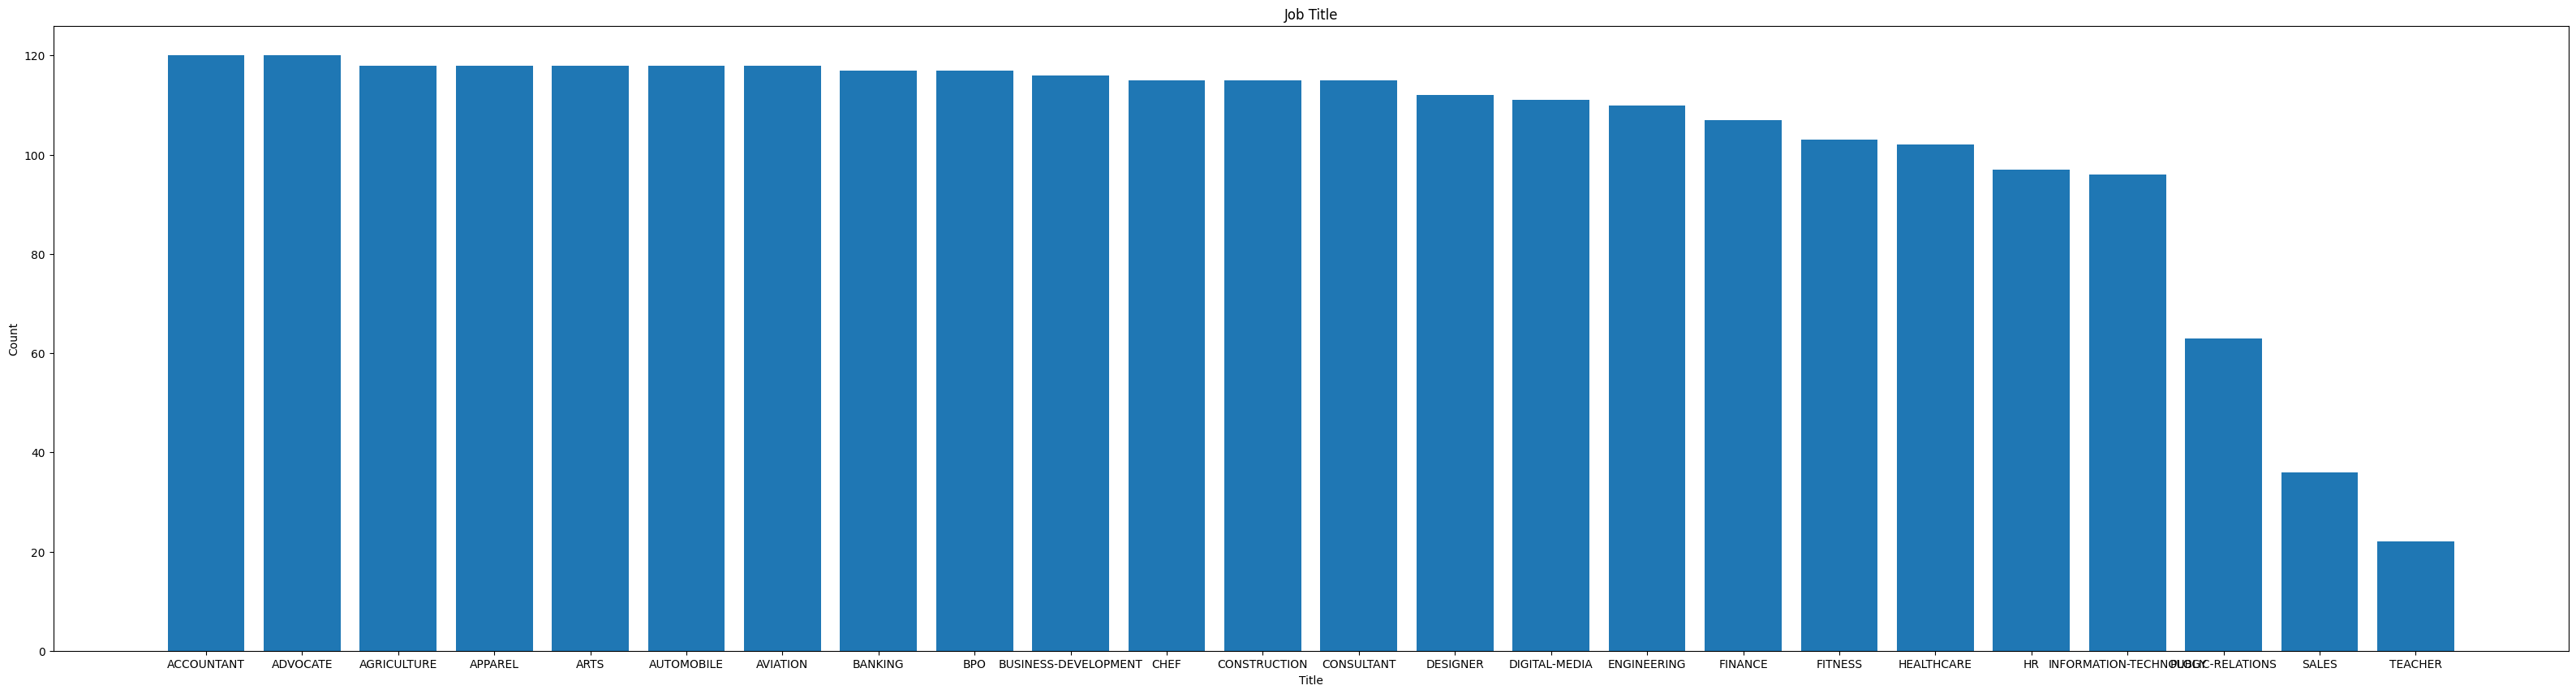

In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.subplots(figsize =(40, 10))
plt.bar(df['Target'].unique(), df['Target'].value_counts())
plt.title('Job Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

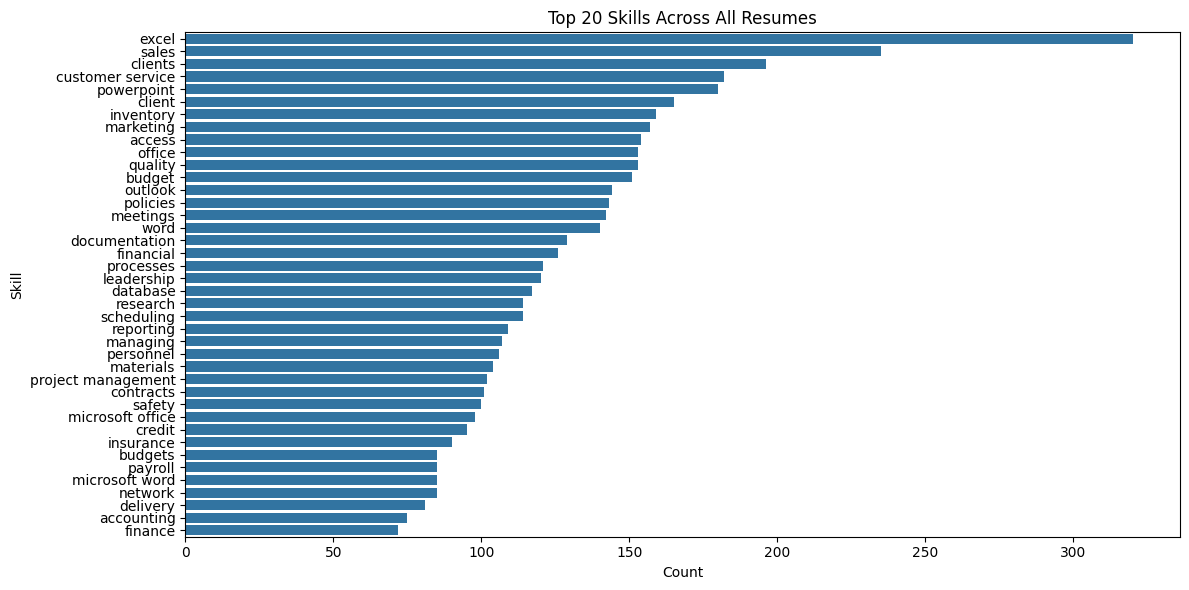

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


def extract_skills(skill_series):
    skills = []
    for entry in skill_series.dropna():
        skills.extend([skill.strip().lower() for skill in entry.split(',')])
    return skills


all_skills = extract_skills(df['Skills'])


skill_counts = Counter(all_skills)


top_skills = skill_counts.most_common(40)


skill_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])


plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Skill', data=skill_df) 
plt.title('Top 20 Skills Across All Resumes')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()


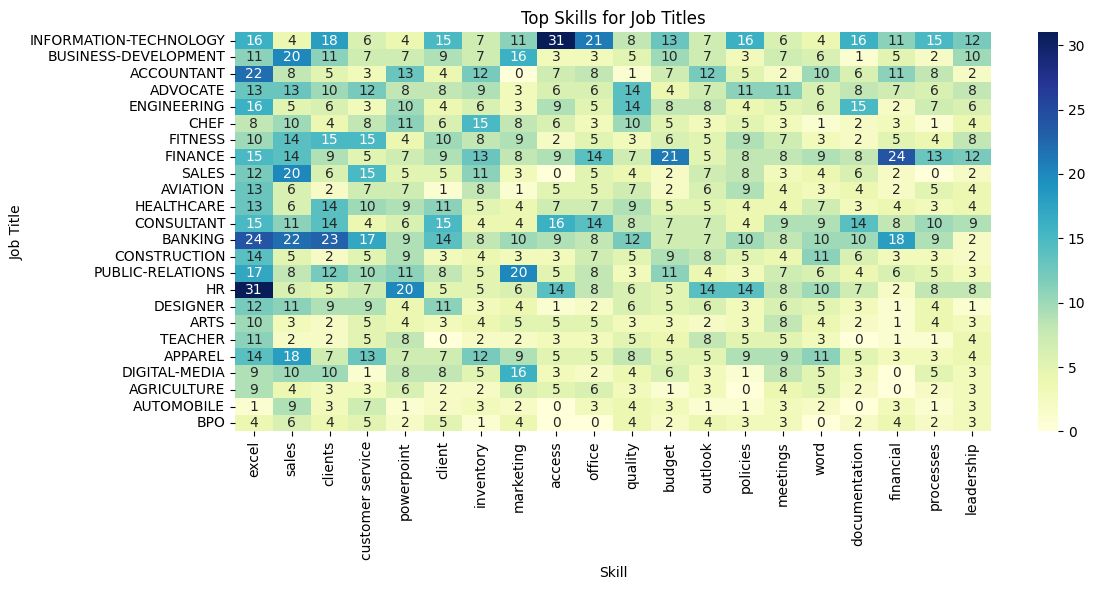

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


def extract_skills(skill_series):
    skills = []
    for entry in skill_series.dropna():
        skills.extend([skill.strip().lower() for skill in entry.split(',')])
    return skills


top_jobs = df['Target'].value_counts().index


all_skills = extract_skills(df['Skills'])
top_skills = [skill for skill, _ in Counter(all_skills).most_common(20)]


skill_matrix = pd.DataFrame(0, index=top_jobs, columns=top_skills)


for job in top_jobs:
    job_skills = extract_skills(df[df['Target'] == job]['Skills'])
    skill_counts = Counter(job_skills)
    for skill in top_skills:
        skill_matrix.loc[job, skill] = skill_counts.get(skill, 0)


plt.figure(figsize=(12, 6))
sns.heatmap(skill_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Top Skills for Job Titles')
plt.xlabel('Skill')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


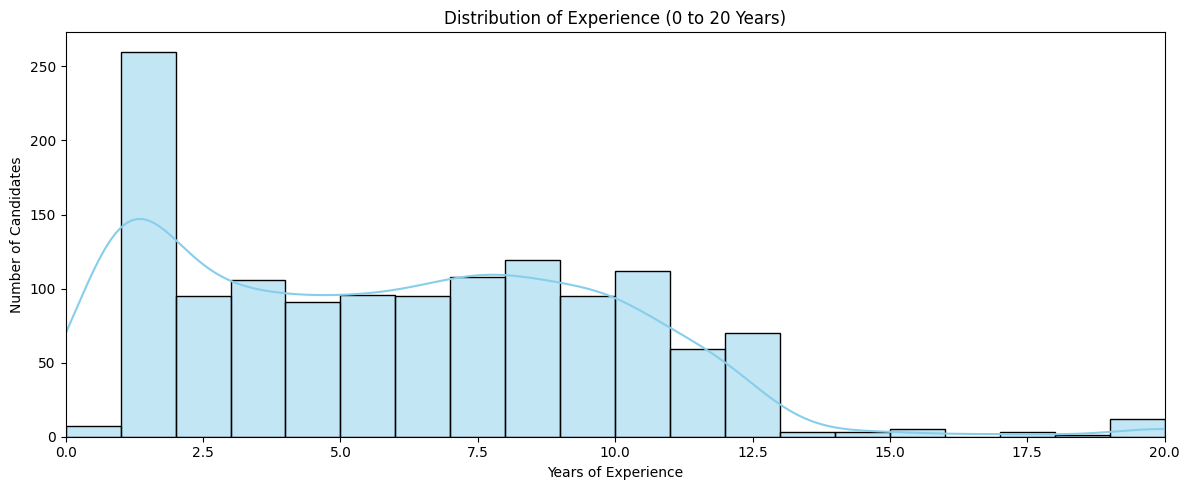

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


def parse_experience(exp):
    if pd.isna(exp):
        return None
    exp = exp.lower().strip()
    if 'fresher' in exp:
        return 0.0
    match = re.search(r"(\d+(\.\d+)?)", exp)
    return float(match.group(1)) if match else None


df['Experience_Years'] = df['Experience'].apply(parse_experience)


exp_data = df['Experience_Years'].dropna()


max_exp = 20
filtered_exp_data = exp_data[exp_data <= max_exp]


plt.figure(figsize=(12, 5))
sns.histplot(filtered_exp_data, bins=20, kde=True, color='skyblue')
plt.title(f'Distribution of Experience (0 to {max_exp} Years)')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Candidates')
plt.xlim(0, max_exp)
plt.tight_layout()
plt.show()



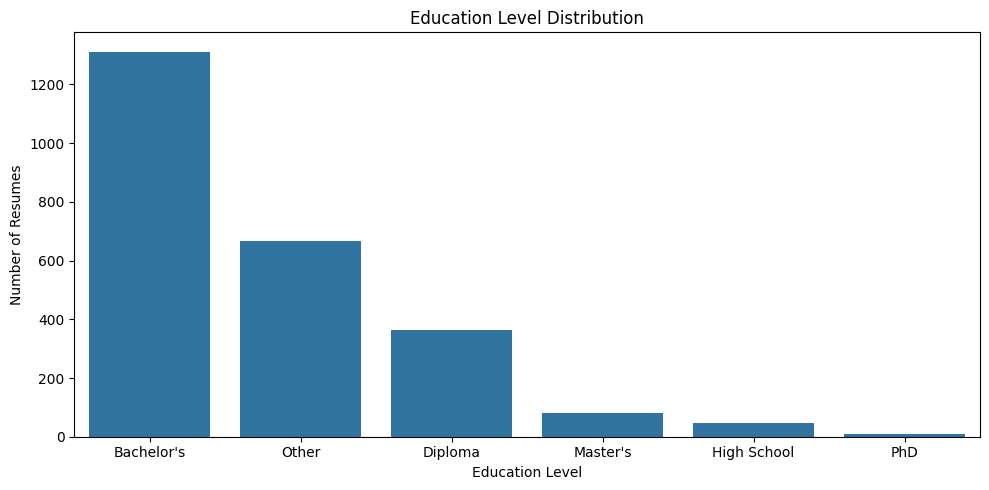

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def normalize_degree(text):
    if pd.isna(text):
        return 'Unknown'
    text = text.lower()
    if 'bachelor' in text or 'b.sc' in text or 'b.tech' in text:
        return "Bachelor's"
    elif 'master' in text or 'm.sc' in text or 'm.tech' in text:
        return "Master's"
    elif 'phd' in text or 'doctor' in text:
        return "PhD"
    elif 'diploma' in text:
        return 'Diploma'
    elif '12th' in text or 'high school' in text:
        return 'High School'
    else:
        return 'Other'


df['Normalized_Education'] = df['Education'].apply(normalize_degree)


edu_counts_df = df['Normalized_Education'].value_counts().reset_index()
edu_counts_df.columns = ['Education Level', 'Count']


plt.figure(figsize=(10, 5))
sns.barplot(data=edu_counts_df, x='Education Level', y='Count')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Number of Resumes")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_22780\3151049062.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned = df.applymap(


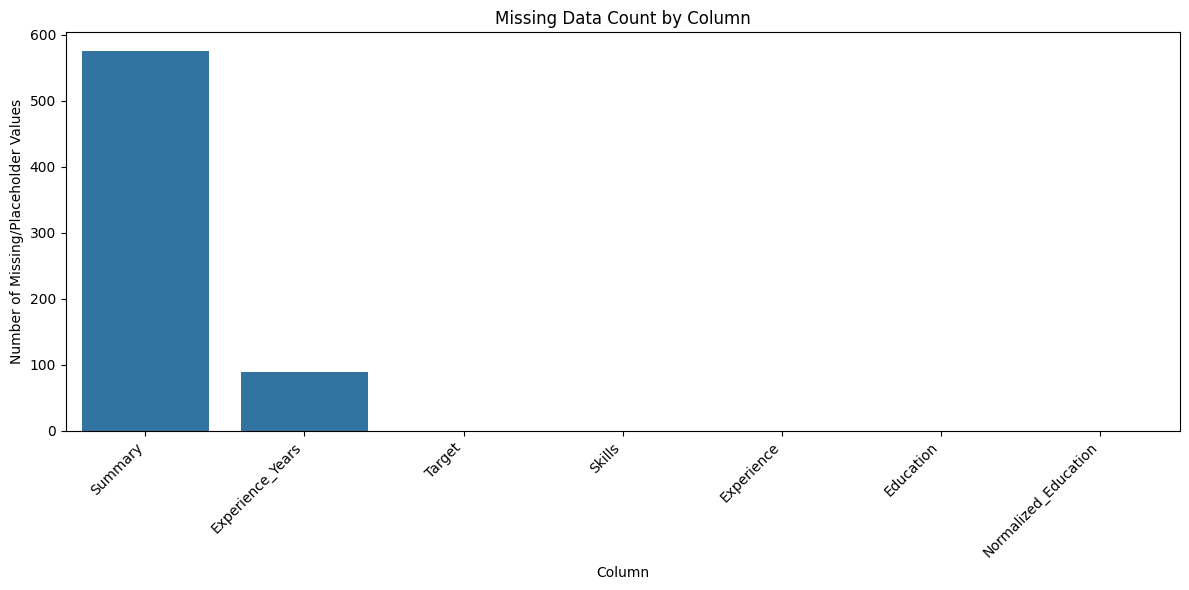

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


placeholders = ['no summary available', 'not specified', 'n/a', 'na', '-', '', 'none']
data_cleaned = df.applymap(
    lambda x: pd.NA if isinstance(x, str) and x.strip().lower() in placeholders else x
)


missing_counts = data_cleaned.isna().sum()
missing_counts = missing_counts[missing_counts >= 0]


if not missing_counts.empty:
    missing_df = missing_counts.reset_index()
    missing_df.columns = ['Column', 'Missing Count']
    missing_df = missing_df.sort_values(by='Missing Count', ascending=False)


    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_df, x='Column', y='Missing Count')
    plt.title('Missing Data Count by Column')
    plt.xlabel('Column')
    plt.ylabel('Number of Missing/Placeholder Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing or placeholder values found in any column.")
